# Exploring Feedforward Neural Networks with the Fashion MNIST Dataset

Name: Sebastian Firsaev

Student ID: C00263348

Semester: two - 2024

Guide notebook used: https://github.com/trekhleb/machine-learning-experiments/blob/master/experiments/digits_recognition_mlp/digits_recognition_mlp.ipynb

As part of my learning process, I will initially recreate a notebook focused on building a Multilayer Perceptron (MLP) model using TensorFlow to recognize handwritten digits. This foundational work will serve as a stepping stone to the more complex task of classifying fashion items.

In this Jupyter notebook, I will investigate the functionality and effectiveness of Feedforward Neural Networks (FFNNs) using the Fashion MNIST dataset. The primary goal is to develop a model capable of classifying fashion items into their respective categories accurately. The Fashion MNIST dataset, a modern replacement for the traditional hand-written digits MNIST, includes various articles of clothing and accessories, providing a more challenging classification task.

The process will begin with loading and exploring the Fashion MNIST dataset to understand the different categories of fashion items it contains. This will be followed by preprocessing the data to format it suitably for use with a neural network, including normalizing pixel values and encoding categorical labels.

Subsequently, I will construct the FFNN model using TensorFlow and Keras, focusing on developing a robust architecture that includes multiple layers, neurons, and activation functions tailored to the task of image classification. The network will be trained with the preprocessed data, employing techniques like batch processing and epochs to optimize the learning process.

Finally, the performance of the model will be assessed through various metrics, including accuracy and loss charts. We will also use the trained model to make predictions on new fashion item images to evaluate its real-world applicability.


### What are Feedforward Neural Networks?

Feedforward Neural Networks, or FFNNs, are the simplest type of artificial neural network wherein connections between the nodes do not form a cycle. This architecture is distinguished by having input, hidden, and output layers where each layer's neurons are connected to the neurons of the subsequent layer with no feedback loops (i.e., the information moves in only one direction—from input to output). FFNNs are widely used for pattern recognition and classification tasks.

In the context of our task, the FFNN will be used to identify various fashion items within the Fashion MNIST dataset. As in the preliminary experiment with handwritten digits recognition, the MLP will consist of multiple layers with non-linear activation functions capable of handling data that is not linearly separable.

This integrated approach will facilitate a comprehensive understanding of neural networks in image classification tasks, beginning with digit recognition and advancing to the classification of fashion products.

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)


Python version: 3.12.0
Tensorflow version: 2.16.1


## Configuring Tensorboard

We will use [Tensorboard](https://www.tensorflow.org/tensorboard) to debug the model later.

In [3]:
# Load the TensorBoard notebook extension.
# %reload_ext tensorboard
%load_ext tensorboard

In [4]:
# Clear any logs from previous runs.
!rm -rf ./.logs/

'rm' is not recognized as an internal or external command,
operable program or batch file.


## Load the data

The **training** dataset consists of 60000 28x28px images of hand-written digits from `0` to `9`.

The **test** dataset consists of 10000 28x28px images.

In [5]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

In [6]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


## Explore the data

Here is how each image in the dataset looks like. It is a 28x28 matrix of integers (from `0` to `255`). Each integer represents a color of a pixel.

In [7]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


This matrix of numbers may be drawn as follows: 

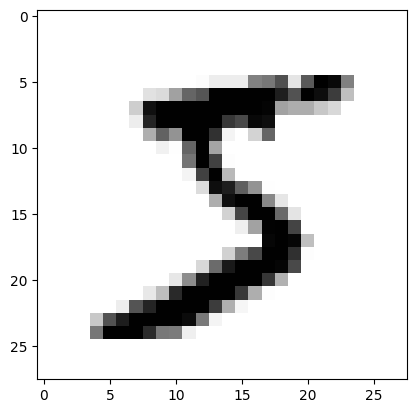

In [8]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

Let's print some more training examples to get the feeling of how the digits were written.

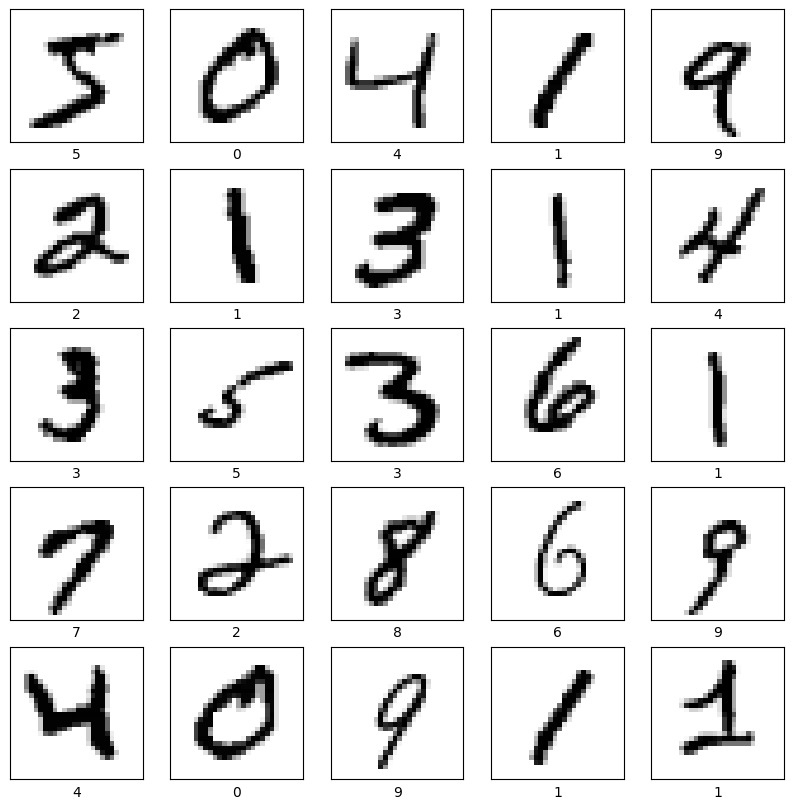

In [9]:
numbers_to_display = 25
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(10,10))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

## Normalize the data

Here we're just trying to move from values range of `[0...255]` to `[0...1]`.

In [10]:
x_train_normalized = x_train / 255
x_test_normalized = x_test / 255

In [11]:
with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(pd.DataFrame(x_train_normalized[0]))

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.69,0.10,0.65,1.00,0.97,0.50,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.12,0.14,...,0.88,0.67,0.99,0.95,0.76,0.25,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.19,0.93,0.99,...,0.36,0.32,0.32,0.22,0.15,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.86,0.99,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.31,0.61,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Let's see how the digits look like after normalization. We're expecting it to look similar to original.

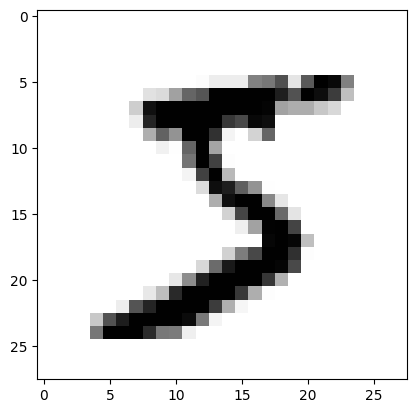

In [12]:
plt.imshow(x_train_normalized[0], cmap=plt.cm.binary)
plt.show()

## Build the model

We will use [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential?version=stable) Keras model with 4 layers:

- Layer 1: [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten?version=stable) layer that will flatten image 2D matrix into 1D vector.
- Layer 2: **Input** [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable) layer with `128` neurons and [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu?version=stable) activation.
- Layer 3: **Hidden** [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable) layer with `128` neurons and [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu?version=stable) activation.
- Layer 4: **Output** [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense?version=stable) layer with `10` [Softmax](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax?version=stable) outputs. The output represents the network guess. The 0-th output represents a probability that the input digit is `0`, the 1-st output represents a probability that the input digit is `1` and so on...

In this example we will use `kernel_regularizer` parameter of the layer to control overfitting of the model. Another common approach to fight overfitting though might be using a [dropout layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) (i.e. `tf.keras.layers.Dropout(0.2)`).

In [13]:
model = tf.keras.models.Sequential()

# Input layers.
model.add(tf.keras.layers.Flatten(input_shape=x_train_normalized.shape[1:]))
model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu,
    kernel_regularizer=tf.keras.regularizers.l2(0.002)
))

# Hidden layers.
model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu,
    kernel_regularizer=tf.keras.regularizers.l2(0.002)
))

# Output layers.
model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax
))

c:\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Here is our model summary so far.

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In order to plot the model the `graphviz` should be installed. For Mac OS it may be installed using `brew` like `brew install graphviz`.

In [15]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

You must install pydot (`pip install pydot`) for `plot_model` to work.


## Compile the model

In [16]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

## Train the model

In [17]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=10,
    validation_data=(x_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8726 - loss: 0.7747 - val_accuracy: 0.9536 - val_loss: 0.3176
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9538 - loss: 0.3094 - val_accuracy: 0.9572 - val_loss: 0.2684
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9605 - loss: 0.2607 - val_accuracy: 0.9585 - val_loss: 0.2598
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9644 - loss: 0.2344 - val_accuracy: 0.9639 - val_loss: 0.2289
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9660 - loss: 0.2218 - val_accuracy: 0.9655 - val_loss: 0.2232
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9684 - loss: 0.2095 - val_accuracy: 0.9684 - val_loss: 0.2017
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9689 - loss: 0.2020 - val_accuracy: 0.9703 - val_loss: 0.1949
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9705 - loss: 0.1944 -

Let's see how the loss function was changing during the training. We expect it to get smaller and smaller on every next epoch.

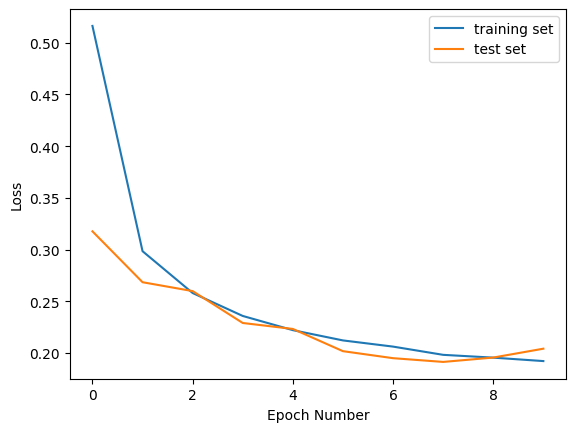

In [18]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

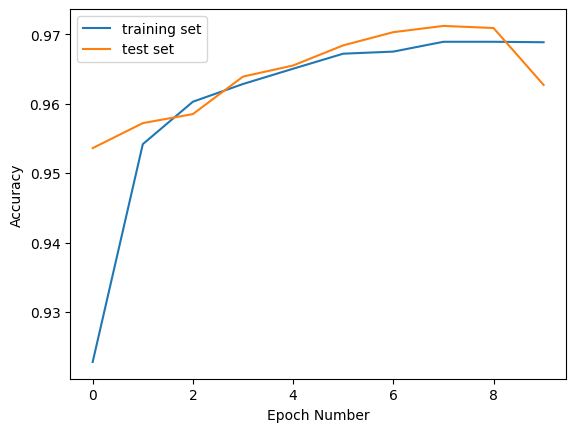

In [19]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()

## Evaluate model accuracy

We need to compare the accuracy of our model on **training** set and on **test** set. We expect our model to perform similarly on both sets. If the performance on a test set will be poor comparing to a training set it would be an indicator for us that the model is overfitted and we have a "high variance" issue.

### Training set accuracy

In [20]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train)

In [21]:
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

Training loss:  0.19226795434951782
Training accuracy:  0.9674833416938782


### Test set accuracy

In [22]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_test_normalized, y_test)

In [23]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.2040814757347107
Validation accuracy:  0.9627000093460083


## Save the model

We will save the entire model to a `HDF5` file. The `.h5` extension of the file indicates that the model should be saved in Keras format as HDF5 file. To use this model on the front-end we will convert it (later in this notebook) to Javascript understandable format (`tfjs_layers_model` with .json and .bin files) using [tensorflowjs_converter](https://www.tensorflow.org/js/tutorials/conversion/import_saved_model) as it is specified in the [main README](https://github.com/trekhleb/machine-learning-experiments).

In [24]:
model_name = 'digits_recognition_mlp.h5'
model.save(model_name, save_format='h5')

In [25]:
loaded_model = tf.keras.models.load_model(model_name)

## Use the model (do predictions)

To use the model that we've just trained for digits recognition we need to call `predict()` method.

In [26]:
predictions_one_hot = loaded_model.predict([x_test_normalized])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [27]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (10000, 10)


Each prediction consists of 10 probabilities (one for each number from `0` to `9`). We need to pick the digit with the highest probability since this would be a digit that our model most confident with.

In [28]:
# Predictions in form of one-hot vectors (arrays of probabilities).
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,2.163913e-06,4.942506e-07,8.440480e-05,1.584034e-03,4.167671e-07,3.719605e-05,9.476714e-10,9.961036e-01,3.919081e-06,2.183650e-03
1,2.766458e-04,1.266490e-04,9.463508e-01,4.076154e-03,2.736847e-08,1.573234e-05,5.232980e-04,4.973974e-07,4.863016e-02,2.103062e-08
2,4.902508e-05,9.645740e-01,1.135050e-03,7.463483e-04,6.137839e-03,3.658836e-04,2.311378e-03,8.866559e-03,1.572583e-02,8.796847e-05
3,9.963888e-01,3.953926e-05,1.309275e-03,4.233638e-05,4.682889e-04,3.453882e-05,1.102840e-03,1.012265e-04,3.843114e-05,4.745675e-04
4,3.599082e-05,2.316310e-07,7.306239e-05,1.282000e-06,9.921023e-01,2.115556e-06,2.507198e-05,9.847290e-05,1.036600e-06,7.660409e-03
...,...,...,...,...,...,...,...,...,...,...
9995,6.674409e-07,1.656842e-04,9.951047e-01,4.136251e-03,9.035497e-11,7.198037e-08,1.034500e-08,4.173100e-05,5.509463e-04,1.851923e-08
9996,5.383990e-08,5.238468e-06,2.790815e-05,9.995275e-01,1.744325e-09,3.179007e-04,1.999366e-10,6.786732e-06,6.394694e-05,5.075464e-05
9997,5.077845e-09,6.650267e-08,2.645519e-09,6.161200e-08,9.996817e-01,1.264297e-08,2.037799e-08,1.212688e-06,9.552492e-07,3.160356e-04
9998,5.329437e-06,3.055905e-07,1.677064e-07,7.517236e-05,2.666272e-07,9.983187e-01,1.744797e-04,4.992723e-07,1.421178e-03,3.961133e-06


In [29]:
# Let's extract predictions with highest probabilites and detect what digits have been actually recognized.
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


So our model is predicting that the first example from the test set is `7`.

In [30]:
print(predictions[0])

7


Let's print the first image from a test set to see if model's prediction is correct.

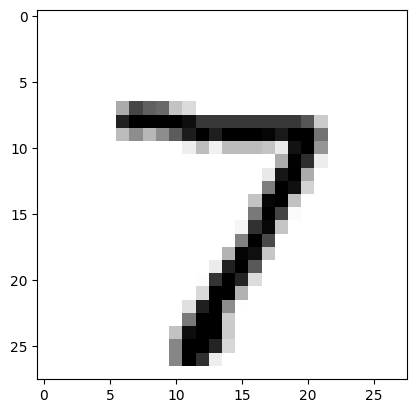

In [31]:
plt.imshow(x_test_normalized[0], cmap=plt.cm.binary)
plt.show()

We see that our model made a correct prediction and it successfully recognized digit `7`. Let's print some more test examples and correspondent predictions to see how model performs and where it does mistakes.

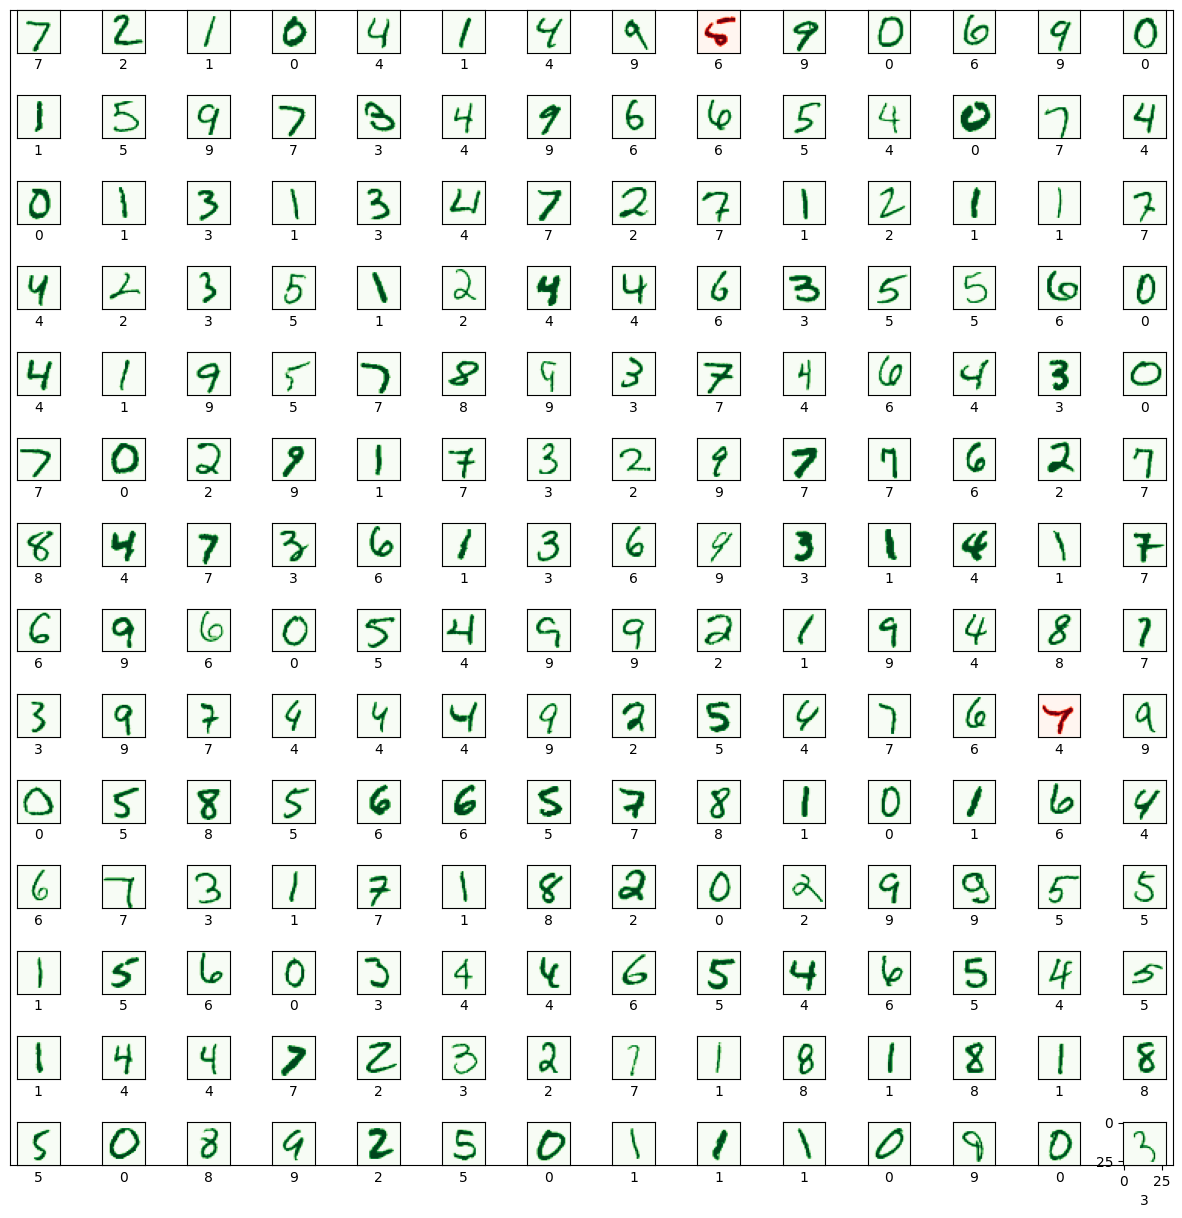

In [32]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index], cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

## Plotting a confusion matrix

[Confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) shows what numbers are recognized well by the model and what numbers the model usually confuses to recognize correctly. You may see that the model performs really well but sometimes (28 times out of 10000) it may confuse number `5` with `3` or number `2` with `3`.

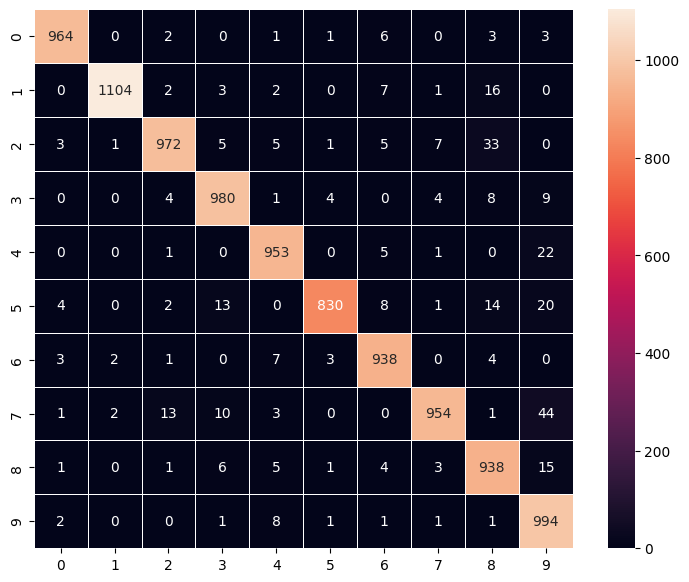

In [33]:
confusion_matrix = tf.math.confusion_matrix(y_test, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

# Feedforward Neural Networks with the Fashion MNIST Dataset

In [35]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


### Data Understanding

After loading the Fashion MNIST dataset using the `fashion_mnist.load_data()` function, it's essential to understand the structure and characteristics of the data before moving forward with model development. This dataset comprises 60,000 training images and 10,000 testing images, each labeled from 0 to 9, representing different fashion categories. Each image is a 28x28 grayscale representation of a clothing item. The labels correspond to classes such as T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, and Ankle boot. 

In this section, we will perform initial explorations to get a sense of image contents, label distribution, and some basic statistics about the dataset. This exploratory data analysis will help us better prepare the data for feeding into a feedforward neural network.

In [36]:

# Display shapes of the dataset
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


### Normalize Data

Before we proceed with building our neural network model, it's crucial to normalize the pixel values of our images. The pixel values in the Fashion MNIST dataset range from 0 to 255, each representing the intensity of the color in grayscale. Normalizing these pixel values to a range between 0 and 1 makes the training process more stable and faster, helping in the convergence of the model during training.

Normalization is done by dividing each pixel value by 255.0 (since 255 is the maximum value for the pixel intensity in grayscale images). This transformation is applied uniformly across all the images in both the training and testing datasets.



In [37]:

# Normalizing the data to range [0, 1]
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0

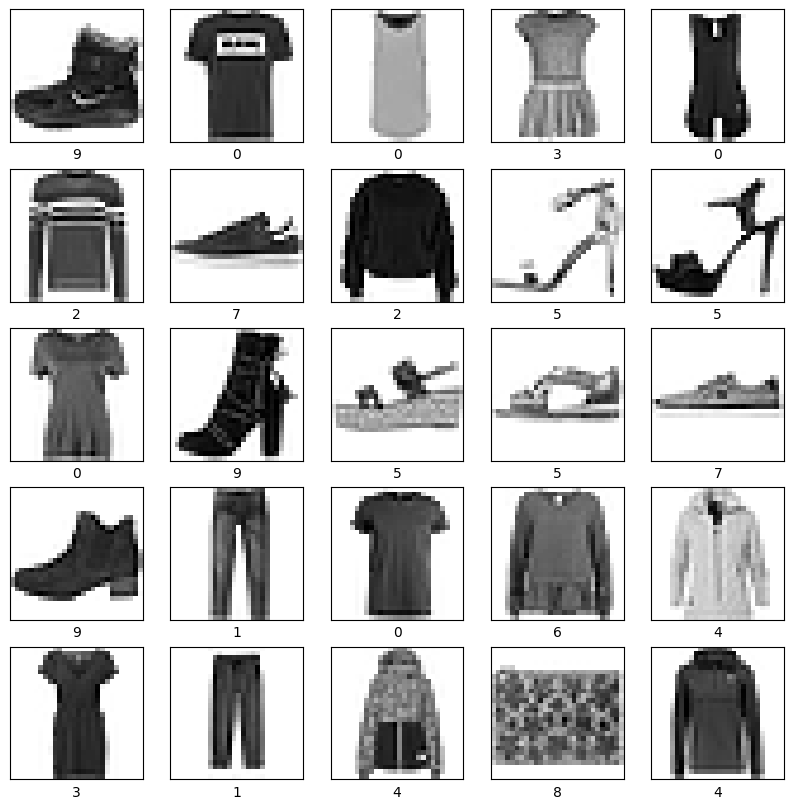

In [38]:
# Display some training examples
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_normalized[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

### Define the Model

The model we are using is a simple feedforward neural network constructed with Keras, a high-level neural networks API. Here's a breakdown of each layer in the model:

1. **Flatten Layer**: The first layer of our network, `Flatten`, is used to transform the format of the images from a two-dimensional array (28 pixels by 28 pixels) to a one-dimensional array (28 * 28 = 784 pixels). This layer acts as the input layer, with no learning parameters. It simply restructures the input data so that it can be processed by subsequent dense layers.

2. **First Dense Layer**: This is a fully connected layer with 128 nodes (or neurons). Each node receives input from all 784 nodes of the flattened input layer. The activation function used here is 'relu' (Rectified Linear Unit). The relu function is defined as `f(x) = max(0, x)` and is used to add non-linearity to the model, helping it to learn more complex patterns in the data.

3. **Second Dense Layer**: Following the first dense layer, we have another fully connected layer, this time with 64 nodes. It also uses the 'relu' activation function to introduce non-linear properties to the network, enabling it to capture more detailed features in the input data.

4. **Output Layer**: The final layer is a dense layer with 10 nodes, one for each class of the Fashion MNIST dataset. This layer uses the 'softmax' activation function, which is ideal for multi-class classification tasks like ours. The softmax function converts the outputs to probability-like values, ensuring that the sum of all the probabilities of the output layer equals 1. The highest probability indicates the model's prediction.

In [39]:
# Build the model
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.002)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.002)),
    tf.keras.layers.Dense(10, activation='softmax')
])

c:\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
# Compile the model
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
# Setup logging directory for TensorBoard
log_dir = ".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


### Training the Model

The training process is the phase where the neural network learns to classify images from the dataset into their respective categories. This is done by adjusting the network's weights based on the error of its predictions. Below is an explanation of the fit method's parameters and the training dynamics:

x_train_normalized: This is the set of input features, which in this context are the normalized pixel values of the fashion images. Normalization ensures that all pixel values are within the same range, promoting faster and more stable training.

y_train: These are the actual labels for the training data. During training, the model will use these labels to determine how well it is performing by comparing its predictions to these true labels.

epochs=10: An epoch is defined as one complete pass through the entire training dataset. The model will iterate over the entire dataset a total of 10 times. With each epoch, the model should improve its weights and biases to minimize the error in its predictions.

validation_data=(x_test_normalized, y_test): This is a tuple containing the test data and its corresponding labels. The model will not train on this data; instead, it will evaluate its performance on this dataset after each epoch to ensure that it generalizes well to new, unseen data and to monitor for overfitting.

callbacks=[tensorboard_callback]: Callbacks are a set of functions that are applied at given stages of the training procedure. In this case, we have a callback to TensorBoard, which is a visualization tool provided by TensorFlow. It allows you to view metrics like loss and accuracy in real-time during training, examine the weights and biases, and visualize the computational graph.

During the training process, the model uses a loss function to calculate the discrepancy between the predicted output and the actual output. The optimizer algorithm then updates the weights to minimize this loss. This iterative process improves the model's ability to make accurate predictions. After each epoch, the model is tested on the validation data to track how well it is learning and generalizing from the training data.

In [42]:
# Train the model
training_history = model2.fit(
    x_train_normalized,
    y_train,
    epochs=10,
    validation_data=(x_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.7777 - loss: 0.9965 - val_accuracy: 0.8373 - val_loss: 0.6031
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8443 - loss: 0.5731 - val_accuracy: 0.8124 - val_loss: 0.6101
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8467 - loss: 0.5255 - val_accuracy: 0.8449 - val_loss: 0.5269
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8549 - loss: 0.4980 - val_accuracy: 0.8297 - val_loss: 0.5608
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8639 - loss: 0.4681 - val_accuracy: 0.8494 - val_loss: 0.5041
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8643 - loss: 0.4656 - val_accuracy: 0.8457 - val_loss: 0.5117
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8679 - loss: 0.4516 - val_accuracy: 0.8405 - val_loss: 0.5278
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8663 - loss: 0.4544 

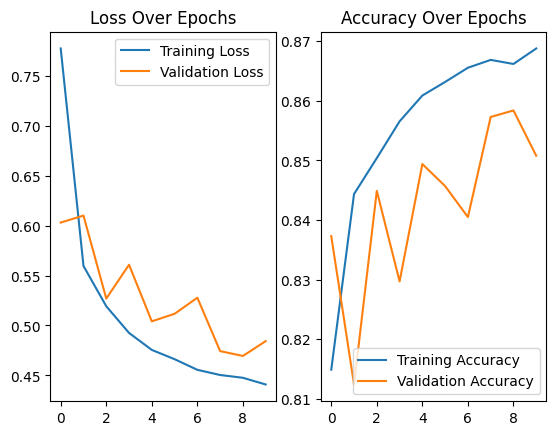

In [43]:
# Plot training history
plt.subplot(1, 2, 1)
plt.plot(training_history.history['loss'], label='Training Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(training_history.history['accuracy'], label='Training Accuracy')
plt.plot(training_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.show()

Training Accuracy: This line increases over time, indicating that the model is getting better at classifying the training data correctly with each epoch. It starts from around 81% accuracy at epoch 0 and reaches above 86% by epoch 10. This steady improvement suggests that the learning process is effective and that the model is increasingly fitting to the training data.

Validation Accuracy: This line is more volatile. It starts just under 84%, peaks around 86% near epoch 8, and then displays some fluctuations, finishing slightly below this peak at epoch 10. The validation accuracy reflects how well the model is generalizing to data it hasn't seen during training.

In [44]:
test_loss, test_accuracy = model2.evaluate(x_test_normalized, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8543 - loss: 0.4786
Test loss: 0.4842795431613922
Test accuracy: 0.8507999777793884


In [45]:
predictions = model2.predict(x_test_normalized)
predicted_classes = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


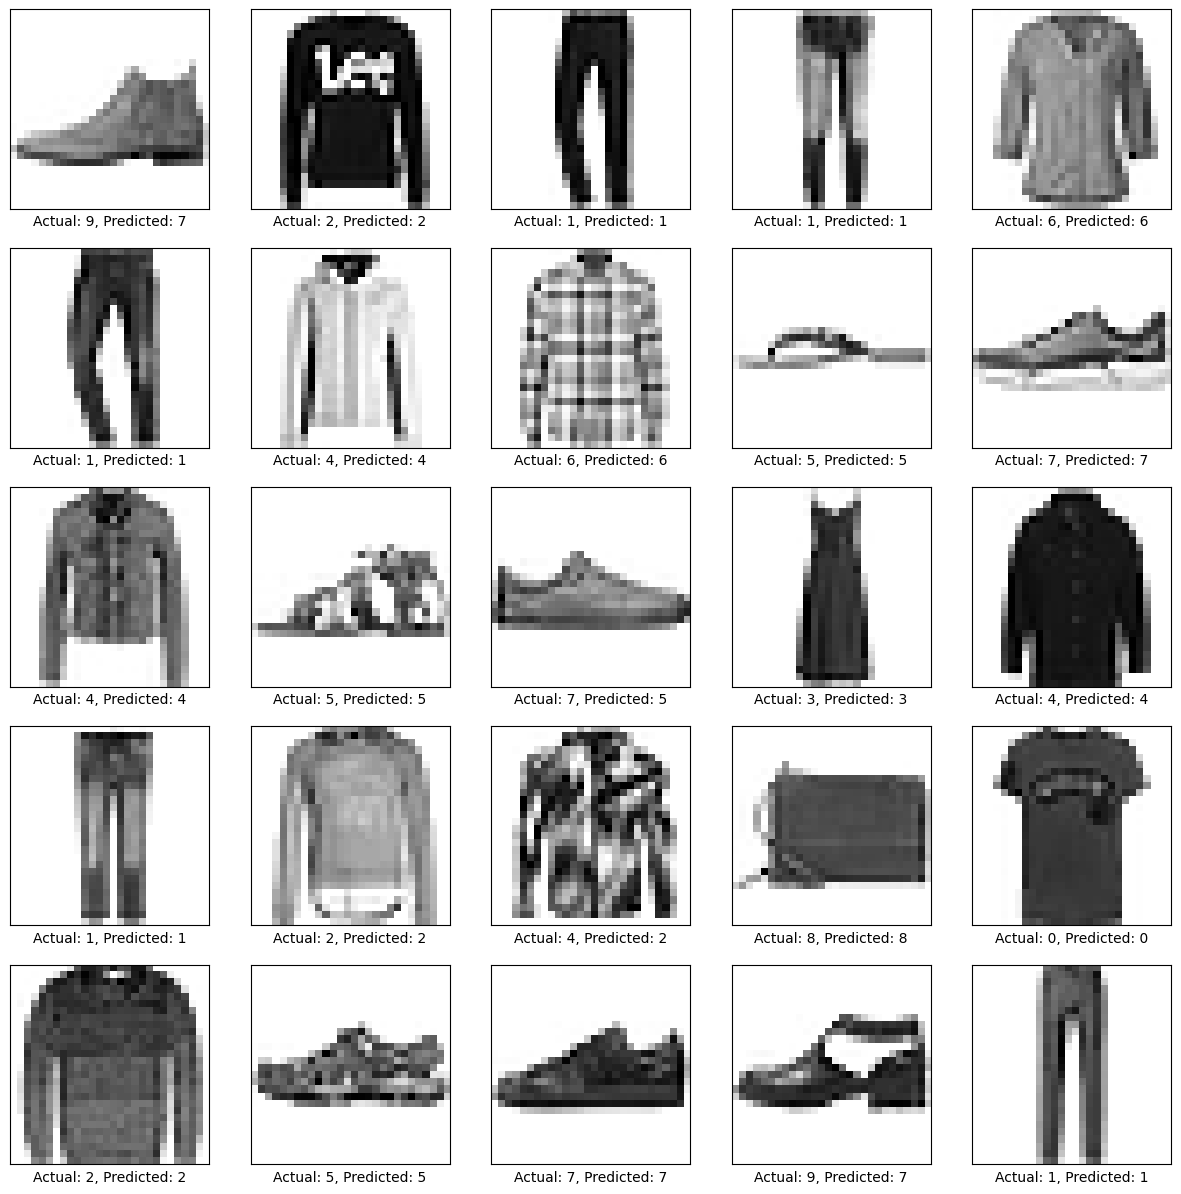

In [46]:
plt.figure(figsize=(15, 15))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test_normalized[i], cmap=plt.cm.binary)
    plt.xlabel(f'Actual: {y_test[i]}, Predicted: {predicted_classes[i]}')
plt.show()

The model seems to struggle a bit when dealing with ankle boots and sneakers 

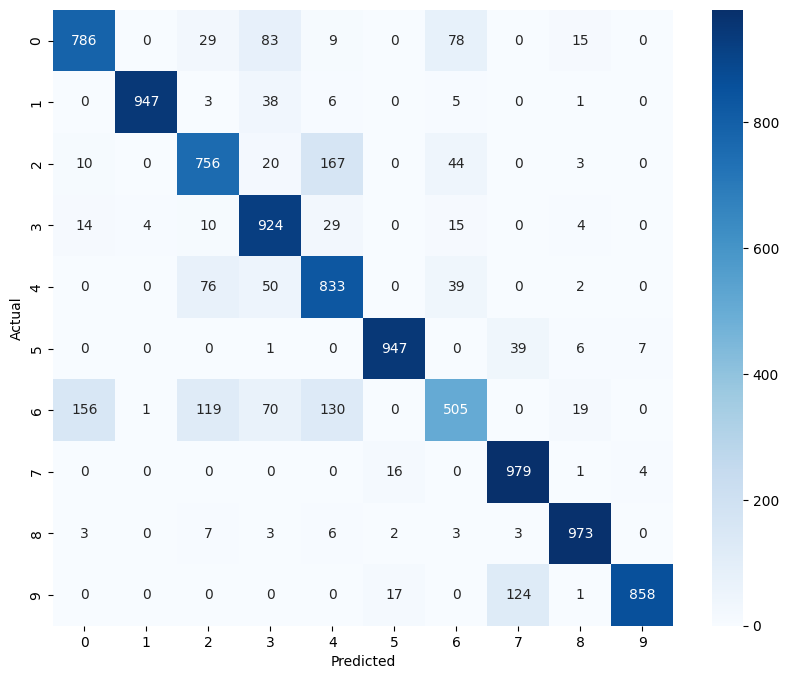

In [47]:
# Confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(10, 8))
sn.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


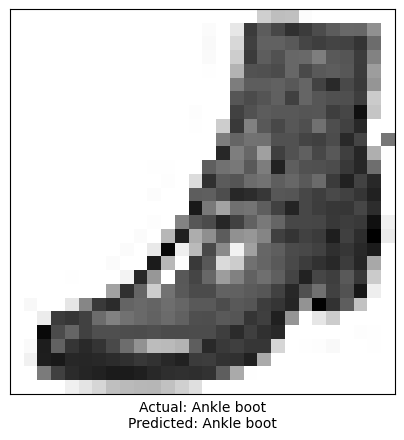

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import random

random_index = random.randint(0, x_test_normalized.shape[0] - 1)
random_image = x_test_normalized[random_index]
random_image_array = np.expand_dims(random_image, 0)  # Reshape for model input

# Predict the label of the randomly selected image
prediction = model2.predict(random_image_array)
predicted_label = np.argmax(prediction)

# Mapping of class indices to class labels (adjust according to dataset specifics)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Display the image and prediction
plt.figure(figsize=(5, 5))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(random_image, cmap=plt.cm.binary)
plt.xlabel(f'Actual: {class_names[y_test[random_index]]}\nPredicted: {class_names[predicted_label]}')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


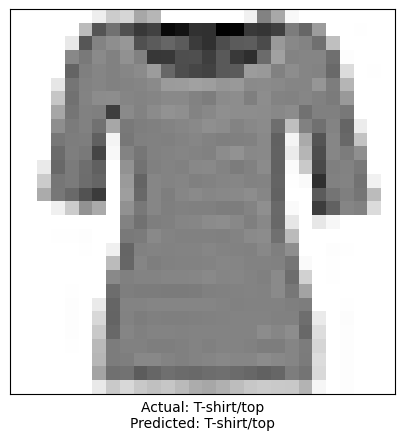

In [49]:
random_index = random.randint(0, x_test_normalized.shape[0] - 1)
random_image = x_test_normalized[random_index]
random_image_array = np.expand_dims(random_image, 0)  # Reshape for model input

# Predict the label of the randomly selected image
prediction = model2.predict(random_image_array)
predicted_label = np.argmax(prediction)

# Mapping of class indices to class labels (adjust according to dataset specifics)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Display the image and prediction
plt.figure(figsize=(5, 5))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(random_image, cmap=plt.cm.binary)
plt.xlabel(f'Actual: {class_names[y_test[random_index]]}\nPredicted: {class_names[predicted_label]}')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


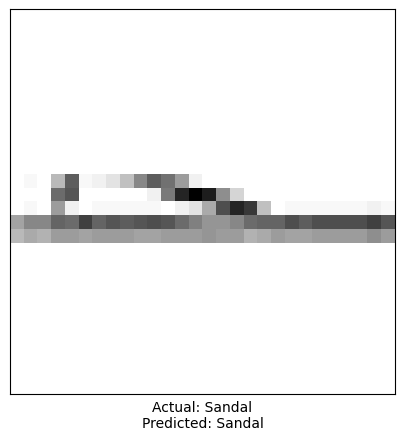

In [50]:
random_index = random.randint(0, x_test_normalized.shape[0] - 1)
random_image = x_test_normalized[random_index]
random_image_array = np.expand_dims(random_image, 0)  # Reshape for model input

# Predict the label of the randomly selected image
prediction = model2.predict(random_image_array)
predicted_label = np.argmax(prediction)

# Mapping of class indices to class labels (adjust according to dataset specifics)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Display the image and prediction
plt.figure(figsize=(5, 5))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(random_image, cmap=plt.cm.binary)
plt.xlabel(f'Actual: {class_names[y_test[random_index]]}\nPredicted: {class_names[predicted_label]}')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


<Figure size 1000x1000 with 0 Axes>

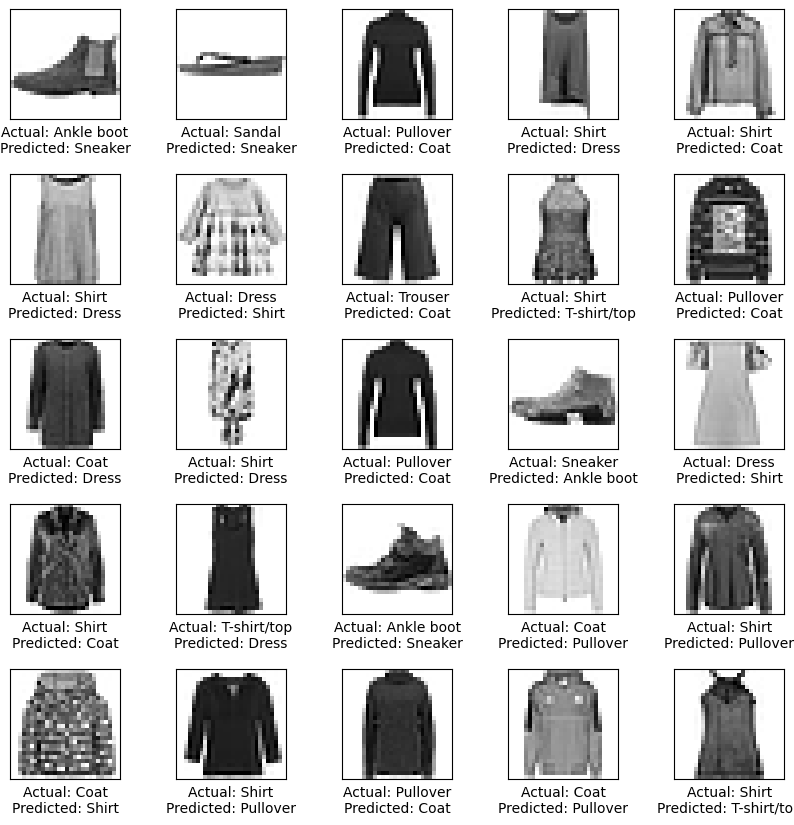

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Predict labels for the entire test set
predictions = model2.predict(x_test_normalized)
predicted_labels = np.argmax(predictions, axis=1)

# Find indices of misclassified examples
misclassified_indices = np.where(predicted_labels != y_test)[0]

# If there are misclassified images, display some of them
if len(misclassified_indices) > 0:
    plt.figure(figsize=(10, 10))

    # Display up to 25 misclassified examples
num_display = min(25, len(misclassified_indices))
num_columns = 5
num_rows = num_display // num_columns + int(num_display % num_columns > 0)

plt.figure(figsize=(2 * num_columns, 2 * num_rows))  # Increase figure size as needed

for i, mis_idx in enumerate(np.random.choice(misclassified_indices, size=num_display, replace=False)):
    plt.subplot(num_rows, num_columns, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test_normalized[mis_idx], cmap=plt.cm.binary, interpolation='nearest')
    plt.xlabel(f'Actual: {class_names[y_test[mis_idx]]}\nPredicted: {class_names[predicted_labels[mis_idx]]}')

plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Adjust horizontal and vertical spacing
plt.show()

# Discussion


We can compare the two models and datasets by taking a look at the confusion matrix for each and analysing the test results
The Digit Recognition Matrix shows that the The model achieves a validation accuracy of approximately 96.27%. This high accuracy indicates that the model is quite proficient at recognizing handwritten digits from the MNIST dataset. With a validation loss of around 0.204 suggests that the model's predictions are quite close to the actual labels, on average.
The majority of the cells off the diagonal (which indicate misclassifications) have very low values, meaning that most digits are classified correctly. A few confusions can be seen between digits that are often similar in handwriting, such as 4s misclassified as 9s, but these are relatively few and these numbers can look similar at times.

The Fashion Item Recognition Matrix displays lower accuracy of about 85.08% on the Fashion MNIST dataset, This aligns with the understanding that the Fashion MNIST is a more complex dataset. With a test loss of 0.484, the predictions are less accurate than the digit recognition model, which is expected due to the more complex nature of the dataset. The misclassifications are more evenly spread across different classes. Notably, there is significant confusion between:
Class 6 (Shirt) and Class 0 (T-shirt/top), and Class 2 (Pullover).
Class 4 (Coat) with Class 2 (Pullover) and Class 6 (Shirt).

Contrasting the Results

The handwritten digit recognition problem is more straightforward compared to the fashion item recognition task. Digits have more standardized forms, while fashion items can vary greatly in appearance due to factors like texture and style, which explains the higher performance on the digit dataset.
The digit recognition model appears to generalize better to the test data. In contrast, the fashion classifier might be struggling with certain items that have a closer resemblance to each other, which is not as common with the digit dataset.
The fashion model may benefit from further fine-tuning, more complex model architectures, or advanced training techniques to handle the increased dataset complexity.

The contrast between these results highlights the differences in difficulty between the two tasks. While the digit recognition task provides a clear-cut and somewhat homogenous set of classes, the fashion MNIST requires the model to distinguish between subtler differences, which naturally leads to a tougher classification challenge and hence lower performance metrics.